In [3]:
from keras.datasets import mnist
import numpy as np 
from web3_softmax.ipynb import *
from web3_sigmoid_v2 import *

ModuleNotFoundError: No module named 'web3_softmax'

In [1]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [2]:

from keras.datasets import mnist

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
y_orig_test = y_test

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [3]:
from tensorflow import keras
from keras.datasets import mnist
from keras import utils as np_utils

# Setup train and test splits
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
# print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

# This is the one-hot version of: [5, 0, 4, 1, 9]
"""
[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
"""

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


'\n[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]\n [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]\n [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]\n [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]\n'

In [5]:
import matplotlib.pyplot as plt 
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=4, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 3140      
                                                                 
 dense_3 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
422/422 [==============================] - 1s 2ms/step - loss: 1.5568 - acc: 0.7092 - val_loss: 1.4731 - val_acc: 0.7493
Epoch 2/100
422/422 [==============================] - 1s 2ms/step - loss: 1.4671 - acc: 0.7188 - val_loss: 1.3905 - val_acc: 0.7470
Epoch 3/100
422/422 [==============================] - 1s 2ms/step - loss: 1.3976 - acc: 0.7191 - val_loss: 1.3322 - val_acc: 0.7400
Epoch 4/100
422/422 [==============================] - 1s 2ms/step - loss: 1.3364 - acc: 0.7203 - val_loss: 1.2819 - val_acc: 0.7442
Epoch 5/100
422/422 [==============================] - 1s 2ms/step - loss: 1.2837 - acc: 0.7238 - val_loss: 1.2165 - val_acc: 0.7415
Epoch 6/100
422/422 [==============================] - 1s 2ms/step - loss: 1.2354 - acc: 0.7282 - val_loss: 1.1693 - val_acc: 0.7558
Epoch 7/100
422/422 [==============================] - 1s 2ms/step - loss: 1.1951 - acc: 0.7351 - val_loss: 1.1458 - val_acc: 0.7408
Epoch 8/100
422/422 [==============================] - 1s 2ms/step - 

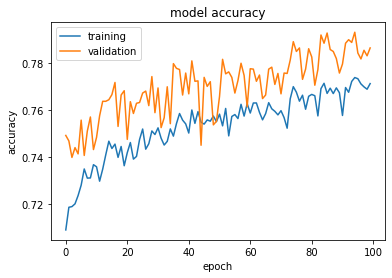

Test loss: 0.795
Test accuracy: 0.772


In [7]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=["acc"])
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [8]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
second_layer_weights = model.layers[1].get_weights()[0]
second_layer_biases  = model.layers[1].get_weights()[1]

In [9]:
fw = (first_layer_weights*1000).astype(int)
sw = (second_layer_weights*10).astype(int) 
fb = first_layer_biases  
sb = second_layer_biases

In [10]:
# fw = first_layer_weights
# sw = second_layer_weights
# fb = first_layer_biases 
# sb = second_layer_biases

In [11]:
fw.shape

(784, 4)

In [12]:
sw.shape

(4, 10)

In [13]:
fw

array([[-55,  26, -46, -61],
       [ 66, -38, -15, -47],
       [ -5, -69,  69,  -6],
       ...,
       [ 28,  82,  73,  71],
       [-75,  39,  23,  -7],
       [ 37,  56, -29, -43]])

In [14]:
sw

array([[ 15,  26,   5,  14, -33,  23,  14, -45,  23, -35],
       [ 23, -40, -20, -25,  16,  16, -22,   4,  12,  21],
       [ -4, -29,  23, -21,  28,  -4,  38, -17, -12, -17],
       [ 27, -33,  21,  22, -16, -11, -26,  33, -20, -14]])

In [15]:
## testing prediction with builtin functions

In [16]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))
def softmax(x):
    sumexp = np.sum(np.exp(x))
    return((np.exp(x)/sumexp))
def layer1(x,w,b):
    return sigmoid(np.dot(x,w)+b)
def layer2(x,w,b):
    return  softmax(np.dot(x,w)+b)

In [17]:
layer1_out = layer1(x_test,fw,fb)
# layer1_out[:50]


/Users/Syed/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [18]:
layer2_out = layer2(layer1_out,sw,sb)
layer2_out[0]

array([2.76898550e-20, 2.98692853e-44, 6.98583051e-22, 4.64583254e-21,
       1.50356482e-37, 6.86730237e-36, 3.05191685e-42, 8.96994448e-16,
       1.65533536e-39, 6.15235175e-36])

In [19]:
pred= np.zeros(layer2_out.shape[0])
for i in range(layer2_out.shape[0]):
    pred[i] = np.argmax(layer2_out[i])

In [20]:
y_orig_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [21]:
pred

array([7., 2., 1., ..., 4., 5., 6.])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_orig_test)

0.6137

In [208]:
# in depth layers

def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


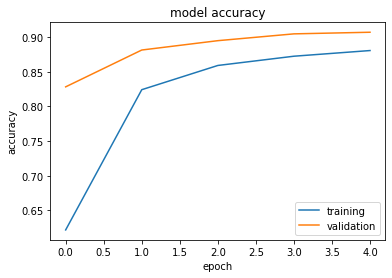


Test loss: 0.494
Test accuracy: 0.888
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


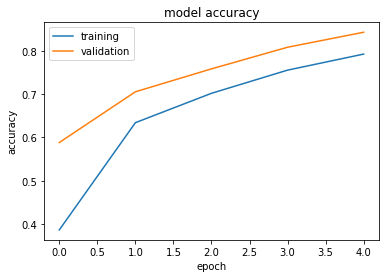


Test loss: 1.16
Test accuracy: 0.814
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_26 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


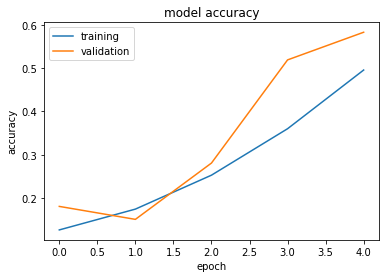


Test loss: 2.15
Test accuracy: 0.569
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_30 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


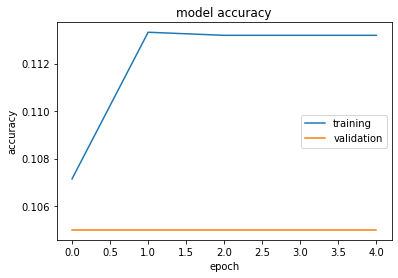


Test loss: 2.29
Test accuracy: 0.113


In [27]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)